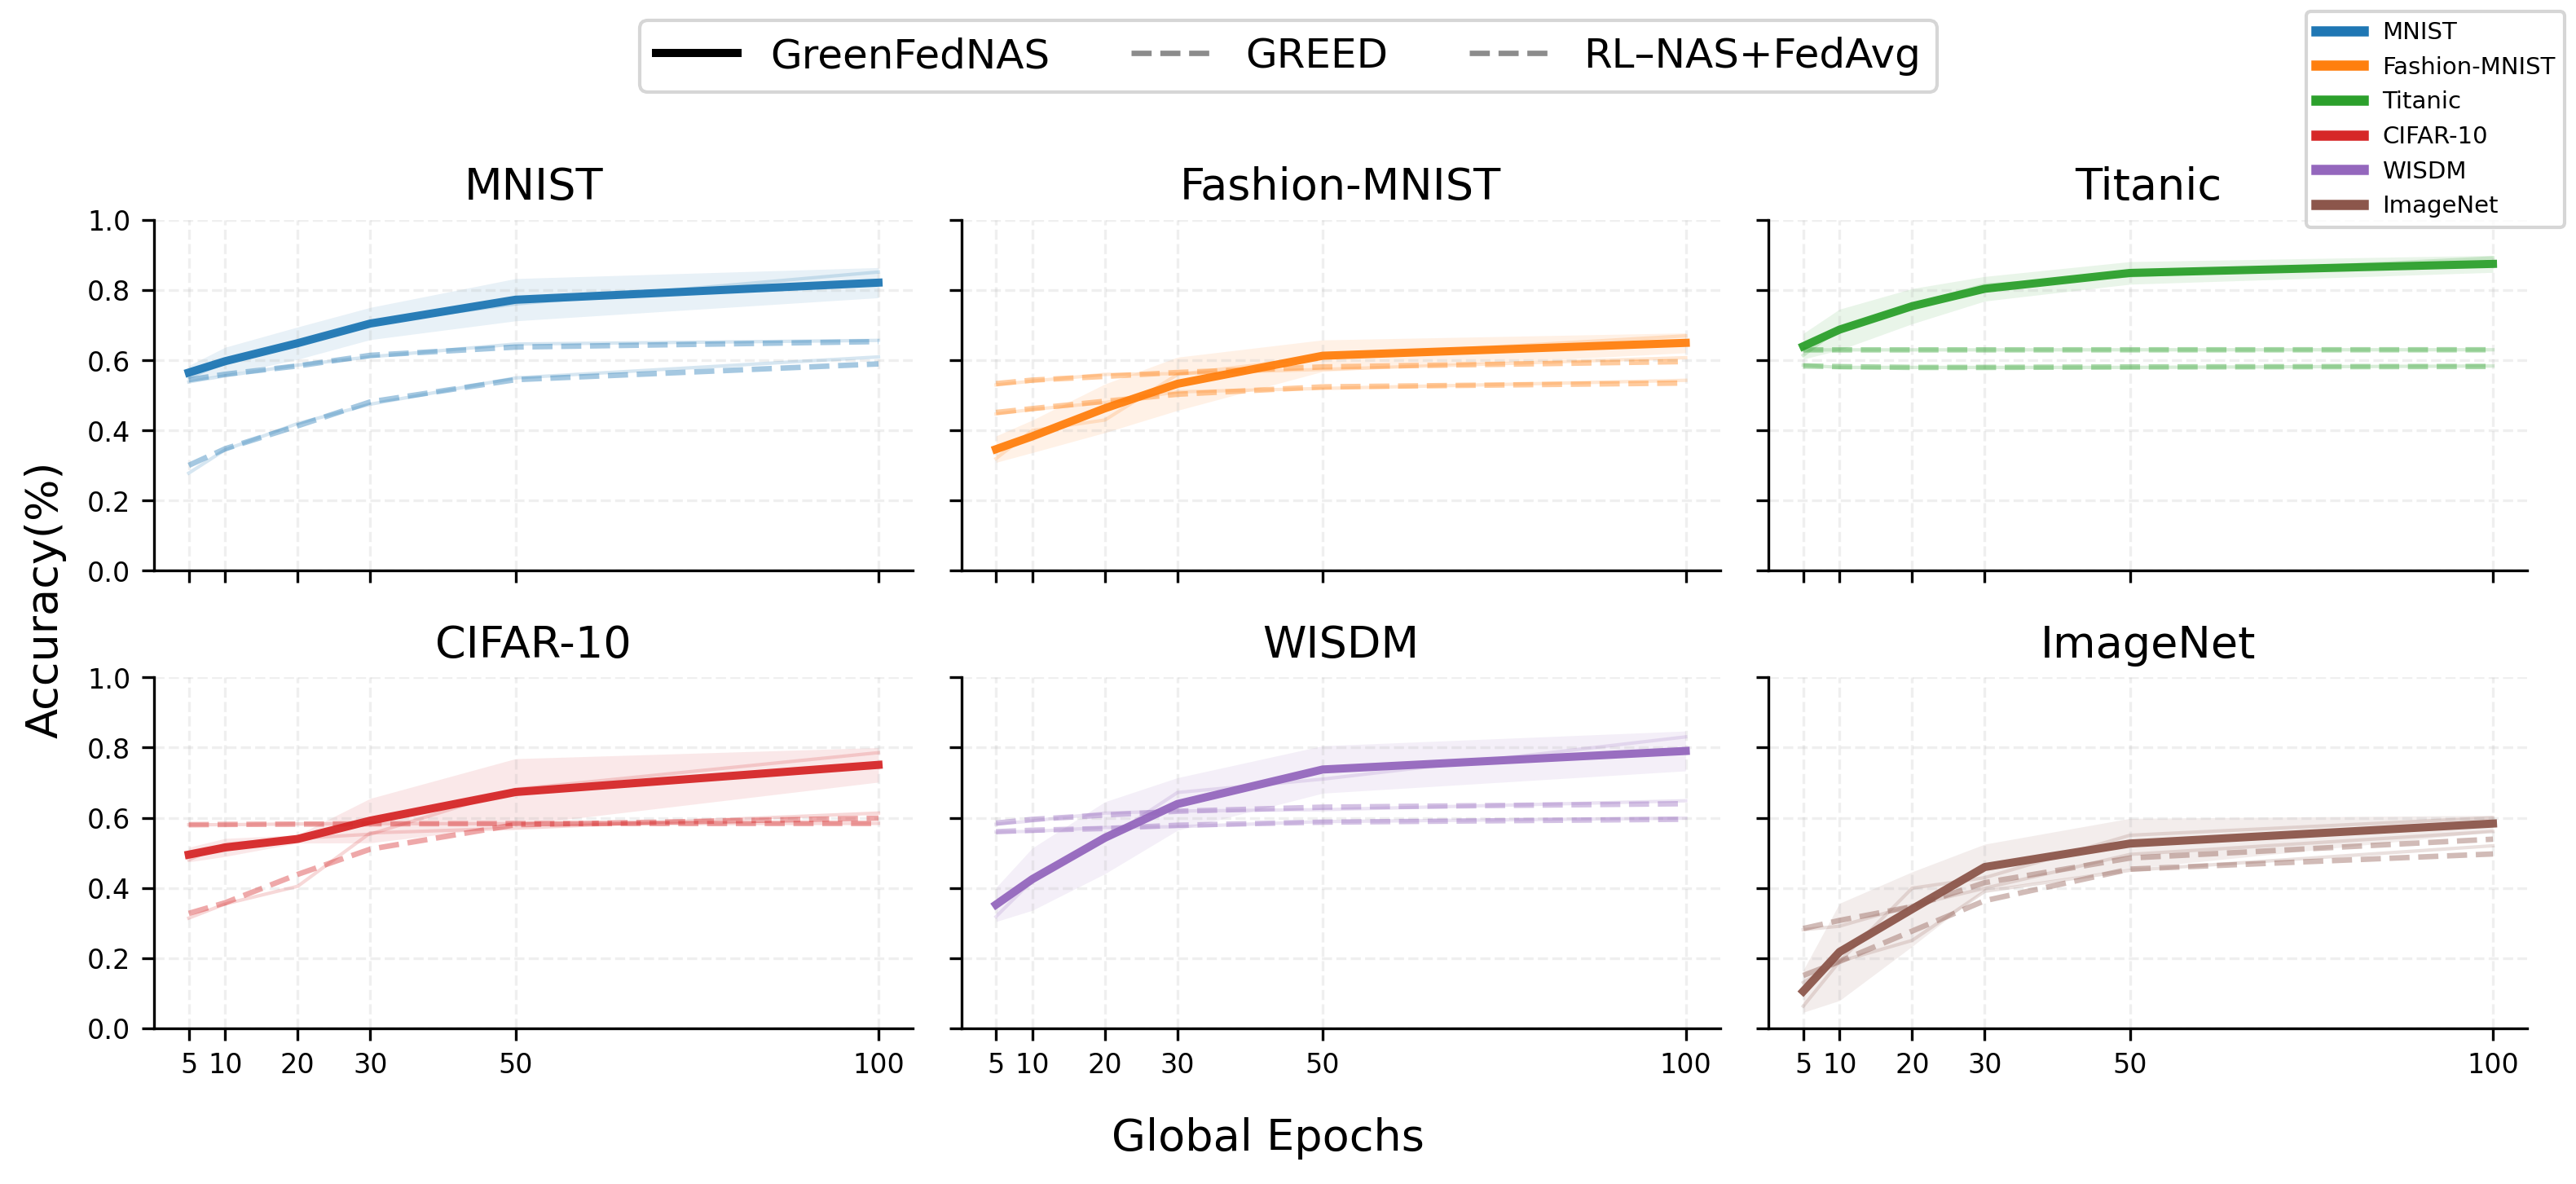

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D

from matplotlib import rcParams

rcParams.update({
    "font.family": "sans-serif",
    "font.sans-serif": ["DejaVu Sans"],
    "mathtext.fontset": "stix",
    "axes.spines.top": False,
    "axes.spines.right": False,
    "axes.linewidth": 0.8,
    "xtick.labelsize": 8,
    "ytick.labelsize": 8,
    "axes.labelsize": 9,
    "axes.titlesize": 9,
    "axes.labelcolor": "black",
    "legend.fontsize": 8,
    "figure.dpi": 300,
})



# =========================
# (b) ACCURACY VS EPOCHS
# =========================
epochs = np.array([5, 10, 20, 30, 50, 100])

mnist_acc = np.array([55.15, 59.30, 64.85, 70.60, 76.10, 85.22]) / 100
rl_acc = np.array([53.88, 55.60, 58.66, 61.02, 64.67, 65.71]) / 100
greed_acc = np.array([27.85, 34.50, 42.00, 47.50, 55.00, 61.00]) / 100

fashion_mnist_acc = np.array([32.01, 40.01, 43.0, 55.99, 61.0, 67.01]) / 100
rl_fashion_acc = np.array([44.71, 46.02, 48.0, 51.03, 52.0, 54.32]) / 100
greed_fashion = np.array([53.0, 54.11, 56.01, 56.22, 57.44, 60.78]) / 100

titanic_acc = np.array([61.45, 69.20, 75.70, 81.50, 84.10, 89.25]) / 100
rl_titanic_acc = np.array([58.66, 58.0, 58.0, 58.0, 58.0, 58.41]) / 100
greed_titanic = np.array([63.0, 63.01, 63.01, 63.01, 63.03, 63.04]) / 100

CIFAR_acc = np.array([48.0, 52.44, 54.1, 55.3, 68.11, 78.56]) / 100
rl_CIFAR_acc = np.array([31.37, 35.40, 40.44, 55.66, 57.01, 61.33]) / 100
greed_CIFAR = np.array([58.0, 58.01, 58.22, 58.3, 58.3, 58.39]) / 100

WISDM_acc = np.array([31.79, 42.09, 53.55, 67.2, 71.01, 83.06]) / 100
rl_WISDM_acc = np.array([55.96, 56.1, 57.22, 57.44, 58.9, 59.88]) / 100
greed_WISDM = np.array([58.15, 59.1, 61.33, 61.9, 62.3, 64.84]) / 100

ImageNet_acc = np.array([6.25, 19.0, 39.9, 42.9, 55.0, 60.0]) / 100
rl_ImageNet_acc = np.array([13.0, 19.0, 25.0, 39.0, 45.0, 52.0]) / 100
greed_ImageNet = np.array([28.06, 29.06, 35.0, 39.9, 49.53, 56.06]) / 100


plt.rcParams.update({
    "font.family": "sans-serif",
    "font.sans-serif": ["DejaVu Sans"],
    "axes.spines.top": False,
    "axes.spines.right": False,
    "axes.linewidth": 0.8,
    "xtick.labelsize": 8,
    "ytick.labelsize": 8,
    "axes.labelsize": 9,
    "axes.titlesize": 13,
    "figure.dpi": 300,
})

# Dataset colors (consistent)
DATASET_COLOR = {
    "MNIST": "#1f77b4",
    "Fashion-MNIST": "#ff7f0e",
    "Titanic": "#2ca02c",
    "CIFAR-10": "#d62728",
    "WISDM": "#9467bd",
    "ImageNet": "#8c564b",
}

# Methods
METHODS = [
    ("GreenFedNAS", dict(lw=2.4, alpha=0.95)),
    ("GREED", dict(lw=1.6, alpha=0.40, linestyle="--")),
    ("RL–NAS+FedAvg", dict(lw=1.6, alpha=0.40, linestyle="--")),
]

# Small rolling mean/std for 6 points (window=3 is best here)
def rolling_mean_std(y, w=3):
    y = np.asarray(y, dtype=float)
    w = 3 if len(y) >= 3 else 1
    pad = w // 2
    yp = np.pad(y, (pad, pad), mode="edge")
    mean = np.empty_like(y)
    std  = np.empty_like(y)
    for i in range(len(y)):
        seg = yp[i:i+w]
        mean[i] = seg.mean()
        std[i]  = seg.std(ddof=0)
    return mean, std

def plot_method(ax, x, y, color, main_style, band=True):
    # raw (thin)
    ax.plot(x, y, color=color, lw=1.0, alpha=0.18)
    # smooth (thick)
    m, s = rolling_mean_std(y, w=3)
    ax.plot(x, m, color=color, **main_style)
    # band
    if band:
        ax.fill_between(x, m - s, m + s, color=color, alpha=0.10, linewidth=0)


series = {
    "MNIST": (mnist_acc, greed_acc, rl_acc),
    "Fashion-MNIST": (fashion_mnist_acc, greed_fashion, rl_fashion_acc),
    "Titanic": (titanic_acc, greed_titanic, rl_titanic_acc),
    "CIFAR-10": (CIFAR_acc, greed_CIFAR, rl_CIFAR_acc),
    "WISDM": (WISDM_acc, greed_WISDM, rl_WISDM_acc),
    "ImageNet": (ImageNet_acc, greed_ImageNet, rl_ImageNet_acc),
}

# =========================
# 2×3 small-multiples plot
# =========================
fig, axs = plt.subplots(2, 3, figsize=(10.6, 4.8), sharex=True, sharey=True)
axs = axs.ravel()

for ax, (ds, (y_gfn, y_greed, y_rl)) in zip(axs, series.items()):
    c = DATASET_COLOR[ds]

    # GreenFedNAS: thicker, solid
    plot_method(ax, epochs, y_gfn, c, dict(lw=2.4, alpha=0.95), band=True)

    # GREED: dashed, lighter
    plot_method(ax, epochs, y_greed, c, dict(lw=1.6, alpha=0.40, linestyle="--"), band=False)

    # RL–NAS+FedAvg: dashed, lighter
    plot_method(ax, epochs, y_rl, c, dict(lw=1.6, alpha=0.40, linestyle="--"), band=False)

    ax.set_title(ds)
    ax.grid(True, linestyle="--", alpha=0.20)
    ax.set_ylim(0.0, 1.0)
    ax.set_xticks(epochs)

# Shared labels
fig.text(0.5, 0.03, "Global Epochs", ha="center", fontsize=13)
fig.text(0.02, 0.5, "Accuracy(%)", va="center", rotation="vertical", fontsize=13)

# Compressed legend (methods only)
method_handles = [
    Line2D([0],[0], color="#000000", lw=2.4, linestyle="-",  label="GreenFedNAS"),
    Line2D([0],[0], color="#000000", lw=1.6, linestyle="--", alpha=0.45, label="GREED"),
    Line2D([0],[0], color="#000000", lw=1.6, linestyle="--", alpha=0.45, label="RL–NAS+FedAvg"),
]
fig.legend(handles=method_handles, loc="upper center", ncol=3, frameon=True, fontsize=12)

# Dataset color key (optional)
dataset_handles = [Line2D([0],[0], color=DATASET_COLOR[k], lw=3, label=k) for k in DATASET_COLOR]
fig.legend(handles=dataset_handles, loc="upper right", ncol=1, frameon=True, fontsize=7)

plt.tight_layout(rect=[0.03, 0.06, 1, 0.90])
plt.show()